In [1]:
import numpy as np
from constants import *
from functions import g, F, peak_freq, gT
from ef import solve_ecc, k
from scipy import integrate
from numpy import log10 as lg
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tqdm import tqdm
from scipy import interpolate
from scipy.integrate import simps
import pickle
import os
#%matplotlib qt

In [2]:
pwd

'/media/subhajit/subhajit2/Research/eGWB/recent/runQ'

In [3]:
# src_dir = os.getcwd()
# os.chdir(src_dir+'/runQ2')

In [4]:
with open('specQ.py', 'r') as read_obj:
    for line in read_obj:
        if 'sizem=' in line:
            print(line)
#sizef=50;sizeh=200;sizem=100;sizez=100;

sizef=20;sizem=80;sizez=80;



In [5]:
ncore=8
sizem=24

In [6]:
pwd

'/media/subhajit/subhajit2/Research/eGWB/recent/runQ'

In [7]:
# P=np.shape(pickle.load(open('multicoreQ/bigarrQ_1.pkl', 'rb')))
# Y=np.zeros((sizem,P[1],P[2]))
# P

In [8]:
# for i in range(ncore):
#     Yi=pickle.load(open('multicoreQ/bigarrQ_'+str(i)+'.pkl', 'rb'))
#     P=np.shape(Yi)
#     for i1,i2 in enumerate(range(i*round(sizem/ncore),i*round(sizem/ncore)+P[0])):
#         Y[i2]=Yi[i1]
        

# Fully numerical Approach

In [9]:
Y=pickle.load(open('multicoreQ/bigarrQ.pkl', 'rb'))

In [10]:
np.shape(Y)


(60, 60, 40)

In [11]:
e0=0.9
q=1
fi=1e-9
ff=1e-7
f0=1e-9
n_har=200
n_pts=100
eta=q/(1+q)**2

In [12]:
Mstar=1e8*MS
zstar=2
z1=0.02
z2=5

In [13]:
sizem=np.shape(Y)[0]
sizez=np.shape(Y)[1]
sizef=np.shape(Y)[2]

In [14]:
Mc1=1e6*MS;Mc2=1e10*MS
Mstar=1e8*MS
zstar=2
z1=0.02
z2=5

In [15]:
farr=np.logspace(lg(fi),lg(ff),sizef)
Mcarr=np.logspace(lg(Mc1/MS),lg(Mc2/MS),sizem)*MS
zarr=np.linspace(z1,z2,sizez)

In [16]:
dn0=1e-4*Mpc**(-3)/Gyr
H0=70*1e3/(Mpc)

In [17]:
def nz(z):
    dzdt=(1+z)*np.sqrt(0.3*(1+z)**3+0.7)
    w1=((1+z)**2*np.exp(-z/zstar))/dzdt
    return w1

def nm(Mc):
    w2=np.exp(-Mc/Mstar)/Mc
    return w2      

def comoving_density_AN(Mc,z):
    dzdt=(1+z)*np.sqrt(0.3*(1+z)**3+0.7)
    w=((1+z)**2*np.exp(-Mc/Mstar)*np.exp(-z/zstar))/dzdt
    allf=w/Mc*dn0/H0
    return allf

In [18]:
#f,m,z
Y1=np.zeros((sizem,sizez,sizef))
for i in range(sizem):
    for j in range(sizez):
        for k in range(sizef):
            #Y1[i][j][k]=4*G/(np.pi*c**2*farr[i])*Y[i][j][k]*nm(Mcarr[j])*nz(zarr[k])*dn0/H0
            Y1[i][j][k]=4*G/(np.pi*c**2*farr[k])*Y[i][j][k]*comoving_density_AN(Mcarr[i],zarr[j])
            
            

In [19]:
hc2arr=np.array([simps(simps(Y1[:,:,yy],Mcarr),zarr) for yy in range(sizef)])

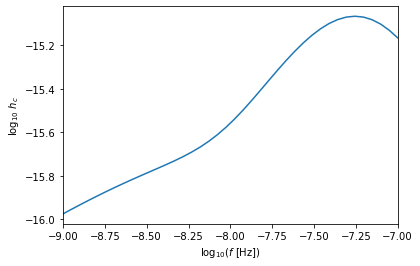

In [20]:

plt.plot(lg(farr),lg(hc2arr)/2)
plt.xlim([lg(fi),lg(ff)])
plt.ylabel(r'$\log_{10} \ h_c$')
plt.xlabel(r'$\log_{10}(f $ [Hz])')
plt.show()

In [21]:
pwd

'/media/subhajit/subhajit2/Research/eGWB/recent/runQ'

In [22]:
np.savetxt('../runK0.9/0.9Q.csv',np.stack((lg(farr),lg(hc2arr)/2), axis=-1))

In [23]:
lfarr,spec=np.loadtxt('scaleQ.csv').transpose()

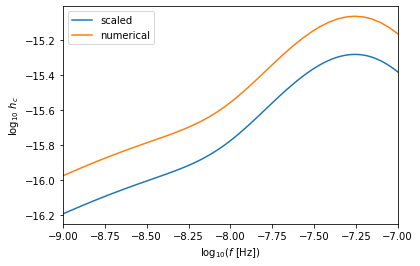

In [24]:
plt.plot(lfarr,spec,label='scaled')
plt.plot(lg(farr),lg(hc2arr)/2,label='numerical')
plt.xlim([lg(fi),lg(ff)])
plt.ylabel(r'$\log_{10} \ h_c$')
plt.xlabel(r'$\log_{10}(f $ [Hz])')
plt.legend()
plt.show()